In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from dask_accelerated import pickler

In [14]:
data = pickler.load_from_notebooks()
print(data)

{'vanilla_filter': {'1000': 0.0029466946919759116, '64000': 0.16373570760091147, '1M': 2.724014679590861, '2M': 5.4312474727630615}, 're2_filter': {'1000': 0.003965139389038086, '64000': 0.15973114967346191, '1M': 2.5163703759511313, '2M': 5.036031484603882}, 'tidre_filter': {'1000': 0.0003012816111246745, '64000': 0.0024251937866210938, '1M': 0.030345439910888672, '2M': 0.06070486704508463}, 'timestamp': '03-Apr-2021_10:29:50'}


In [15]:
timestamp = data['timestamp']
print("Data generated on ", timestamp)

out_dir = './plots/' + timestamp
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

Data generated on  03-Apr-2021_10:29:50


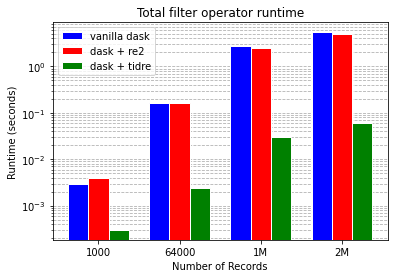

In [16]:
sizes = np.array(list(data['vanilla_filter'].keys()))
vanilla = np.array(list(data['vanilla_filter'].values()))
re2 = np.array(list(data['re2_filter'].values()))
tidre = np.array(list(data['tidre_filter'].values()))

# set width of bar
barWidth = 0.25

# set height of bar
bars1 = vanilla
bars2 = re2
bars3 = tidre

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

fig = plt.figure()
fig.patch.set_facecolor('white')

# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='vanilla dask', zorder=3)
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='dask + re2', zorder=3)
plt.bar(r3, bars3, color='g', width=barWidth, edgecolor='white', label='dask + tidre', zorder=3)

# Add xticks on the middle of the group bars
plt.xlabel('Number of Records')
plt.ylabel('Runtime (seconds)')
plt.xticks([r + (barWidth) for r in range(len(bars1))], sizes)

plt.title('Total filter operator runtime')

axes = plt.gca()
axes.grid(which='both', axis='y', linestyle='--')

plt.yscale('log')

# Create legend & Show graphic
plt.legend()

# Save fig as pdf
plt.savefig(out_dir + '/total_filter_runtime.png')

plt.show()

